# **1 Dataset Collection**

**ChEMBL webresource client** [5]

This is the only official Python client library developed and supported by ChEMBL group. The library helps accessing ChEMBL data and cheminformatics tools from Python. The client handles interaction with the HTTPS protocol and caches all results in the local file system for faster retrieval.

In [ ]:
# Installation
!pip install chembl_webresource_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 679.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 2.7 MB/s eta 0:00:00


## **1.1 Available data entities**

In [ ]:
# import the Chemble database
from chembl_webresource_client.new_client import new_client

# list all available entities in this database
available_resources = [resource for resource in dir(new_client) if not resource.startswith('_')]

available_resources

['activity',
 'activity_supplementary_data_by_activity',
 'assay',
 'assay_class',
 'atc_class',
 'binding_site',
 'biotherapeutic',
 'cell_line',
 'chembl_id_lookup',
 'chembl_release',
 'compound_record',
 'compound_structural_alert',
 'description',
 'document',
 'document_similarity',
 'drug',
 'drug_indication',
 'drug_warning',
 'go_slim',
 'image',
 'mechanism',
 'metabolism',
 'molecule',
 'molecule_form',
 'official',
 'organism',
 'protein_classification',
 'similarity',
 'source',
 'substructure',
 'target',
 'target_component',
 'target_relation',
 'tissue',
 'xref_source']

## **1.2 Available filters**

We can use "filter" to get the specific database as we want. The supported lookup types are:

* exact
* iexact  ("i" means case insensitive)   
* contains
* icontains
* in
* gt
* gte
* lt
* lte (Use to filter molecules by molecular weight)
* startswith
* istartswith
* endswith
* iendswith
* range
* isnull
* regex
* iregex
* search

In [ ]:
import pandas as pd

# extract the "molecule" entity, and filter the wanted data by using pref_name
molecule = new_client.molecule
mols = molecule.filter(pref_name__iexact='aspirin')

mols_pd = pd.DataFrame(mols)
mols_pd

atc_classifications  availability_type  \
0  [B01AC06, N02BA01, N02BA51, A01AD05, N02BA71]                  2   

  biotherapeutic  black_box_warning  chebi_par_id  chemical_probe  chirality  \
0           None                  0         15365               0          2   

                                    cross_references  dosed_ingredient  \
0  [{'xref_id': 'aspirin', 'xref_name': 'aspirin'...              True   

   first_approval  ...  pref_name prodrug structure_type  therapeutic_flag  \
0            1950  ...    ASPIRIN       0            MOL              True   

  topical usan_stem usan_stem_definition usan_substem usan_year withdrawn_flag  
0   False      None                 None         None      None          False  

[1 rows x 36 columns]

## **1.3 Only operator**

"only" is a special method allowing to limit the results to a selected set of fields.

In [ ]:
# We can get some specific columns
activity = new_client.activity
activities = activity.filter(target_chembl_id="CHEMBL235").filter(standard_type="IC50").only(['molecule_chembl_id','canonical_smiles','type','value'])

df_activity = pd.DataFrame(activities)
df_activity.head()

canonical_smiles molecule_chembl_id  type  \
0  CCCc1cc(Oc2ccc(CC(C)C)cc2)ccc1OCCCOc1cccc(C2SC...       CHEMBL327767  IC50   
1  CCCc1cc(Oc2ccc(C(C)C)cc2)ccc1OCCCOc1cccc(C2SC(...        CHEMBL94496  IC50   
2  CCCc1cc(Oc2ccc(Cl)cc2)ccc1OCCCOc1cccc(C2SC(=O)...       CHEMBL420441  IC50   
3            CN(CCOc1ccc(CC2SC(=O)NC2=O)cc1)c1ccccn1          CHEMBL121  IC50   
4  CCCc1cc(Oc2ccccc2)ccc1OCCCCOc1cccc(C2SC(=O)NC2...       CHEMBL330191  IC50   

   value  
0  0.291  
1   0.17  
2  0.073  
3   0.25  
4  0.195

In [ ]:
# We can also get many molecules by id
molecule = new_client.molecule
mols = molecule.filter(molecule_chembl_id__in=['CHEMBL25', 'CHEMBL192', 'CHEMBL27']).only(['molecule_chembl_id', 'pref_name','molecule_structures'])

mols_df = pd.DataFrame(mols)
mols_df

molecule_chembl_id                                molecule_structures  \
0           CHEMBL25  {'canonical_smiles': 'CC(=O)Oc1ccccc1C(=O)O', ...   
1           CHEMBL27  {'canonical_smiles': 'CC(C)NCC(O)COc1cccc2cccc...   
2          CHEMBL192  {'canonical_smiles': 'CCCc1nn(C)c2c(=O)[nH]c(-...   

     pref_name  
0      ASPIRIN  
1  PROPRANOLOL  
2   SILDENAFIL

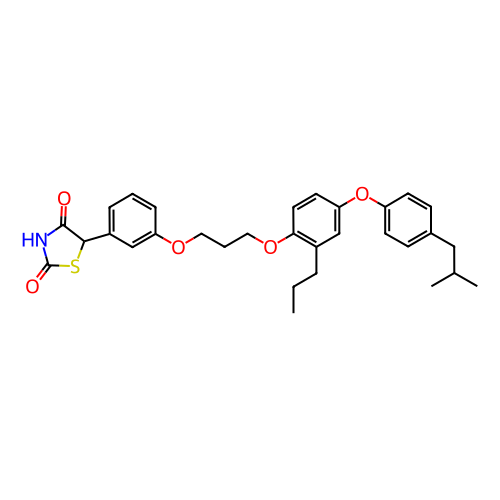

In [ ]:
from IPython.display import SVG

# We can also display the image for any molecules we want
image = new_client.image
image.set_format('svg')
SVG(image.get('CHEMBL327767'))

# **2 Data Processing**

Before we use the retrieved data to build our model, we need to do data preprocessing to make sure our data is well prepared. The data preprocessing mainly includes Cleaning, Normalization, and Transformation. [6]

## **2.1 Cleaning**

We usually need to make sure our data are all numeric for calculation and model building.

".to_numeric()" is being used in such situations, it is one of the general functions in Pandas which is used to convert argument to a numeric type.

### **2.1.1 ".to_numeric()"**

It is one of the general functions in Pandas which is used to convert argument to a numeric type.

In [ ]:
# Use the IC50 dataset as an example:
activity = new_client.activity
activities = activity.filter(target_chembl_id="CHEMBL235").filter(standard_type="IC50")
df_activities = pd.DataFrame(activities)

pd.set_option('display.max_columns', None) # use this to show all columns

df_activities.head()

action_type activity_comment  activity_id activity_properties  \
0        None             None       105368                  []   
1        None             None       108760                  []   
2        None             None       108770                  []   
3        None             None       108782                  []   
4        None             None       115395                  []   

  assay_chembl_id                                  assay_description  \
0    CHEMBL759452  In vitro binding affinity against human peroxi...   
1    CHEMBL759452  In vitro binding affinity against human peroxi...   
2    CHEMBL759452  In vitro binding affinity against human peroxi...   
3    CHEMBL759452  In vitro binding affinity against human peroxi...   
4    CHEMBL759452  In vitro binding affinity against human peroxi...   

  assay_type assay_variant_accession assay_variant_mutation bao_endpoint  \
0          B                    None                   None  BAO_0000190   
1          B                    None                   None  BAO_0000190   
2          B                    None                   None  BAO_0000190   
3          B                    None                   None  BAO_0000190   
4          B                    None                   None  BAO_0000190   

    bao_format              bao_label  \
0  BAO_0000357  single protein format   
1  BAO_0000357  single protein format   
2  BAO_0000357  single protein format   
3  BAO_0000357  single protein format   
4  BAO_0000357  single protein format   

                                    canonical_smiles data_validity_comment  \
0  CCCc1cc(Oc2ccc(CC(C)C)cc2)ccc1OCCCOc1cccc(C2SC...                  None   
1  CCCc1cc(Oc2ccc(C(C)C)cc2)ccc1OCCCOc1cccc(C2SC(...                  None   
2  CCCc1cc(Oc2ccc(Cl)cc2)ccc1OCCCOc1cccc(C2SC(=O)...                  None   
3            CN(CCOc1ccc(CC2SC(=O)NC2=O)cc1)c1ccccn1                  None   
4  CCCc1cc(Oc2ccccc2)ccc1OCCCCOc1cccc(C2SC(=O)NC2...                  None   

  data_validity_description document_chembl_id      document_journal  \
0                      None      CHEMBL1136170  Bioorg Med Chem Lett   
1                      None      CHEMBL1136170  Bioorg Med Chem Lett   
2                      None      CHEMBL1136170  Bioorg Med Chem Lett   
3                      None      CHEMBL1136170  Bioorg Med Chem Lett   
4                      None      CHEMBL1136170  Bioorg Med Chem Lett   

   document_year                                  ligand_efficiency  \
0         2003.0  {'bei': '12.25', 'le': '0.23', 'lle': '-0.96',...   
1         2003.0  {'bei': '13.03', 'le': '0.25', 'lle': '-0.66',...   
2         2003.0  {'bei': '13.94', 'le': '0.28', 'lle': '0.18', ...   
3         2003.0  {'bei': '18.47', 'le': '0.36', 'lle': '4.11', ...   
4         2003.0  {'bei': '13.65', 'le': '0.26', 'lle': '0.02', ...   

  molecule_chembl_id molecule_pref_name parent_molecule_chembl_id  \
0       CHEMBL327767               None              CHEMBL327767   
1        CHEMBL94496               None               CHEMBL94496   
2       CHEMBL420441               None              CHEMBL420441   
3          CHEMBL121      ROSIGLITAZONE                 CHEMBL121   
4       CHEMBL330191               None              CHEMBL330191   

  pchembl_value  potential_duplicate  \
0          6.54                    0   
1          6.77                    0   
2          7.14                    0   
3          6.60                    1   
4          6.71                    0   

                                  qudt_units  record_id relation  src_id  \
0  http://www.openphacts.org/units/Nanomolar     174804        =       1   
1  http://www.openphacts.org/units/Nanomolar     174805        =       1   
2  http://www.openphacts.org/units/Nanomolar     174795        =       1   
3  http://www.openphacts.org/units/Nanomolar     174797        =       1   
4  http://www.openphacts.org/units/Nanomolar     174792        =       1   

   standard_flag sta

In [ ]:
# Use "to_numeric" to convert all data in the "standard_value" column to numeric type
df_activities["standard_value"] = pd.to_numeric(df_activities["standard_value"], errors="coerce")  # errors="coerce" means convert it into NaN

df_activities["standard_value"]

0        291.0
1        170.0
2         73.0
3        250.0
4        195.0
         ...  
2253     566.0
2254    3500.0
2255    5300.0
2256      18.0
2257      18.0
Name: standard_value, Length: 2258, dtype: float64

### **2.1.2 ".dropna()"**

We can use ".dropna()" to drop all NaN values of a given column.

In [ ]:
# drop all rows which contains NaN values for "standard_value"
df_activities = df_activities.dropna(subset=["standard_value"])

df_activities["standard_value"]


0        291.0
1        170.0
2         73.0
3        250.0
4        195.0
         ...  
2253     566.0
2254    3500.0
2255    5300.0
2256      18.0
2257      18.0
Name: standard_value, Length: 2161, dtype: float64

## **2.2 Normalization**

Machine learning algorithms don't perform well when the input numerical attributes have very different scales. So we need Normalization or Standardization to scale our features.

In [ ]:
# First, we can define a DataFrame which has very different scales
data_example = pd.DataFrame({
    "feature_1": [0.5, 0.6, 0.7, 0.8],
    "feature_2": [200, 200, 300, 400]
    })

### **2.2.1 Min-max scaling**

Min-max scaling (many people call this normalization) is the simplest: for each attribute, the values are shifted and rescaled so that they end up ranging from -1 to 1 (or other min/max we want).

This is performed by subtracting the min value and dividing by the difference between the min and the max.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Convert the dataframe into array
data_examplea_arr = data_example.values
print("before normalization: \n", data_examplea_arr)

# Use "Min-max scaling" method to do the feature scaling
min_max_scaler = MinMaxScaler(feature_range=(-1, 1)) # scaled to (0, 1)---check
data_example_scaled_minmax = min_max_scaler.fit_transform(data_examplea_arr) # input our data
print("after normalization: \n", data_example_scaled_minmax)

before normalization: 
 [[  0.5 200. ]
 [  0.6 200. ]
 [  0.7 300. ]
 [  0.8 400. ]]
after normalization: 
 [[-1.         -1.        ]
 [-0.33333333 -1.        ]
 [ 0.33333333  0.        ]
 [ 1.          1.        ]]


### **2.2.2 Standardization**

First it subtracts the mean value (so standardized values have a zero mean), then it divides the result by the standard deviation (so standardized values have a standard deviation equal to 1). Unlike min-max scaling, standardization does not restrict values to a specific range.

In [ ]:
from sklearn.preprocessing import StandardScaler

print("before Standardization: \n", data_examplea_arr)

# Use "Standardization" method to do the feature scaling
std_scaler = StandardScaler()
data_example_std_scaled = std_scaler.fit_transform(data_examplea_arr) #input our data

print("after Standardization: \n", data_example_std_scaled)

before Standardization: 
 [[  0.5 200. ]
 [  0.6 200. ]
 [  0.7 300. ]
 [  0.8 400. ]]
after Standardization: 
 [[-1.34164079 -0.90453403]
 [-0.4472136  -0.90453403]
 [ 0.4472136   0.30151134]
 [ 1.34164079  1.50755672]]


## **2.3 Transformation**

Data transformation is the most important step which includes modifying the raw data and converting it into a better format so that it can be more suitable for analysis and model training purposes.

The normalization and standardization we used above are called feature scaling. It is the most important transformation we need to apply to our data. So besides this, another common transformation is Log Transformation.

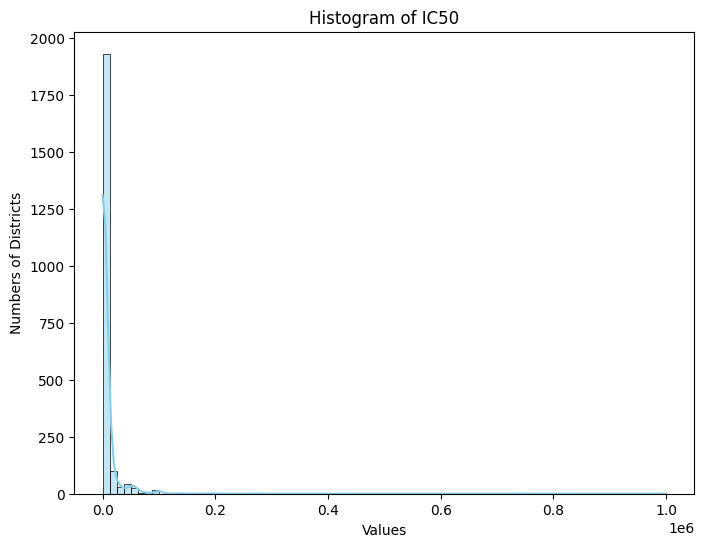

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plot the Histogram for IC50(standard_value column)
plt.figure(figsize=(8, 6))
sns.histplot(df_activities['standard_value'], bins=80, kde=True, color='skyblue')
plt.xlabel('Values')
plt.ylabel('Numbers of Districts')
plt.title('Histogram of IC50')
plt.show()

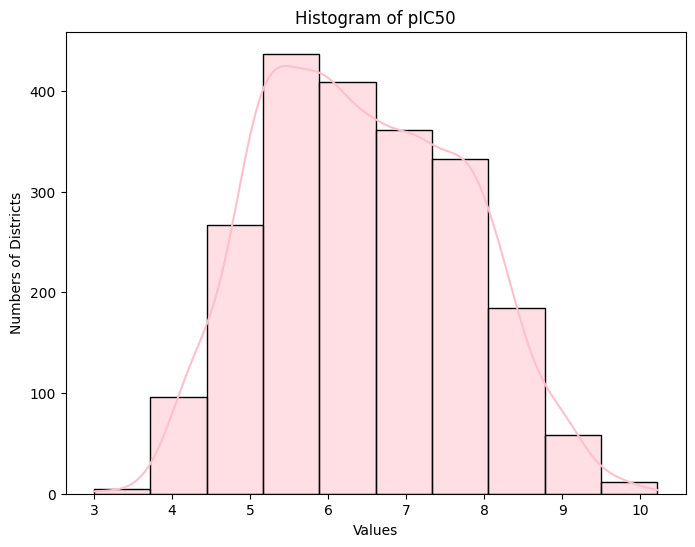

In [ ]:
df_activities['pIC50'] = df_activities['standard_value'].apply(lambda x: -np.log10(x * 1e-9))
df_activities = df_activities[np.isfinite(df_activities['pIC50'])] # drop infinite values

# plot the Histogram for IC50 after Log Transformation
plt.figure(figsize=(8, 6))
sns.histplot(df_activities['pIC50'], bins=10, kde=True, color='pink')
plt.xlabel('Values')
plt.ylabel('Numbers of Districts')
plt.title('Histogram of pIC50')
plt.show()

# **3 Dimensionality Reduction** [6]

## **3.1 Introduction**

**What is the dimentionality reduction?**

Dimensionality reduction is a process used in data analysis and machine learning to reduce the number of features or dimensions in a dataset while retaining as much relevant information as possible.
<br><br>

**Why we need dimentionality reduction?**

Many machine learning tasks involve dealing with thousands or even millions of features for each training example. This large number of features can not only significantly slows down the training process, but also makes it more challenging to identify an optimal solution, because a new instance will likely be far away from any training instance, making predictions much less reliable than in lower dimensions.

Dimensionality reduction can not only speeding up training, but also extremely useful for data visualization. Reducing the number of dimensions down to two (or three) makes it possible to plot a condensed view of a high-dimensional training set on a graph and often gain some important insights by visually detecting patterns. Moreover, data visualization is essential to communicate your conclusions to people who are not data scientists—in particular, decision makers who will use your results.
<br><br>

**Notes:**

Reducing dimensionality will cause some information loss, even though it will speed up training, it may make your system perform slightly worse and also makes your pipelines a bit more complex, thus harder to maintain. So, be sure to train your system with the original data before considering using dimensionality reduction.
<br><br>

**Main Approaches for Dimensionality Reduction:**

1. Projection Learning
2. Manifold Learning




## **3.2 Projection learning**

In most real-world problems, training instances are not spread out uniformly across all dimensions. As a result, all training instances lie within (or close to) a much lower-dimensional subspace of the high-dimensional space.

Here is a simple example of reducing the dataset's dimensionality from 3D to 2D:

* In Figure 8-2, all training instances lie close to a plane: this is a
lower-dimensional(2D) subspace of the higher-dimensional (3D) space.

* If we project every training instance perpendicularly onto this subspace (as represented by the short dashed lines connecting the instances to the plane), we get the new 2D dataset shown in Figure 8-3.

* Note that the axes correspond to new features z1 and z2: they are the coordinates of the projections on the plane.

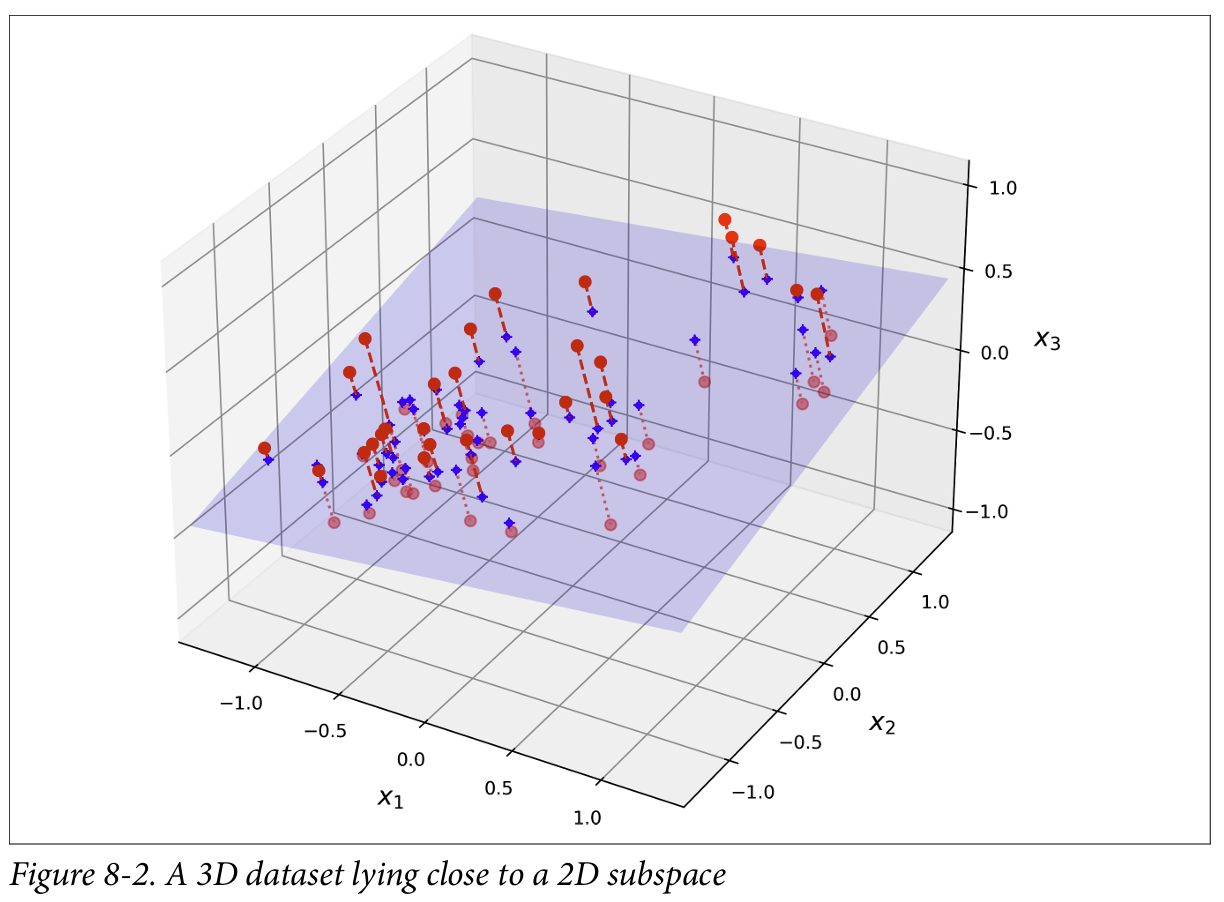

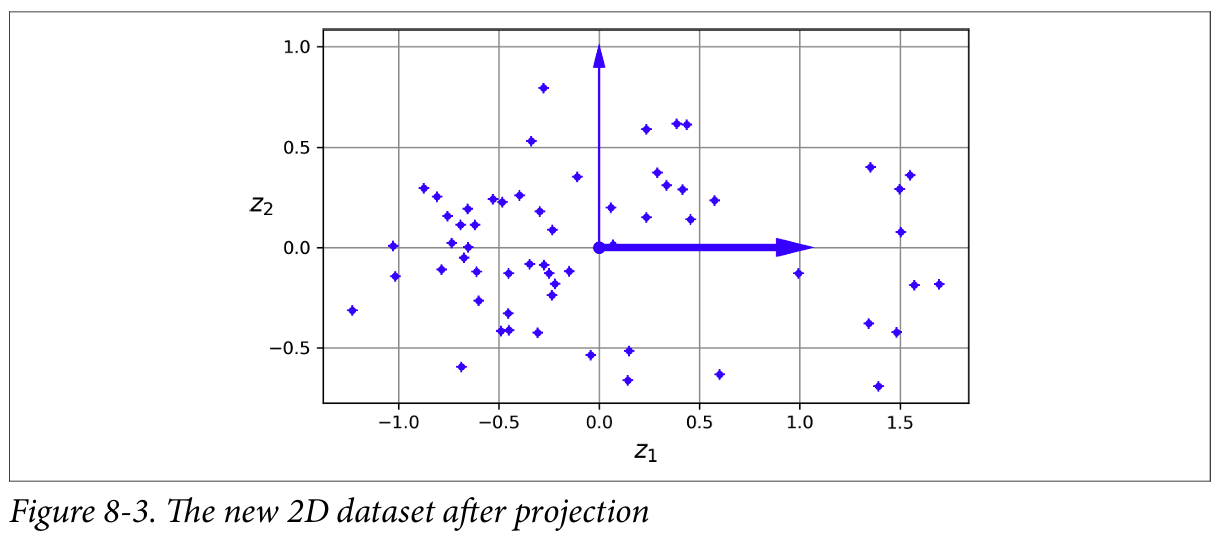

### **3.2.1  Principal component analysis (PCA)**

PCA is by far the most popular dimensionality reduction algorithm. First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it, just like in Figure 8-2.

**3.2.1.1 Preserving the Variance**

Before we can project the training set onto a lower-dimensional hyperplane, we first need to know how to choose the right hyperplane.

Here is an example with 2-D dataset shown in Figure 8-7 below:

* The hyperplane we are going to find in this example is 1-D (lines).

* Here we chose three lines to be the hyperplane (on the right is the result of the projection of the dataset onto each of these lines/axes).

* From this we can see the solid line preserves the maximum variance, and other two lines are not preserving the variance well.

In a word, the good hyperplane should preserve maximum amount of variance after data projection, which also means it has the best ability to preserve relevant data information.


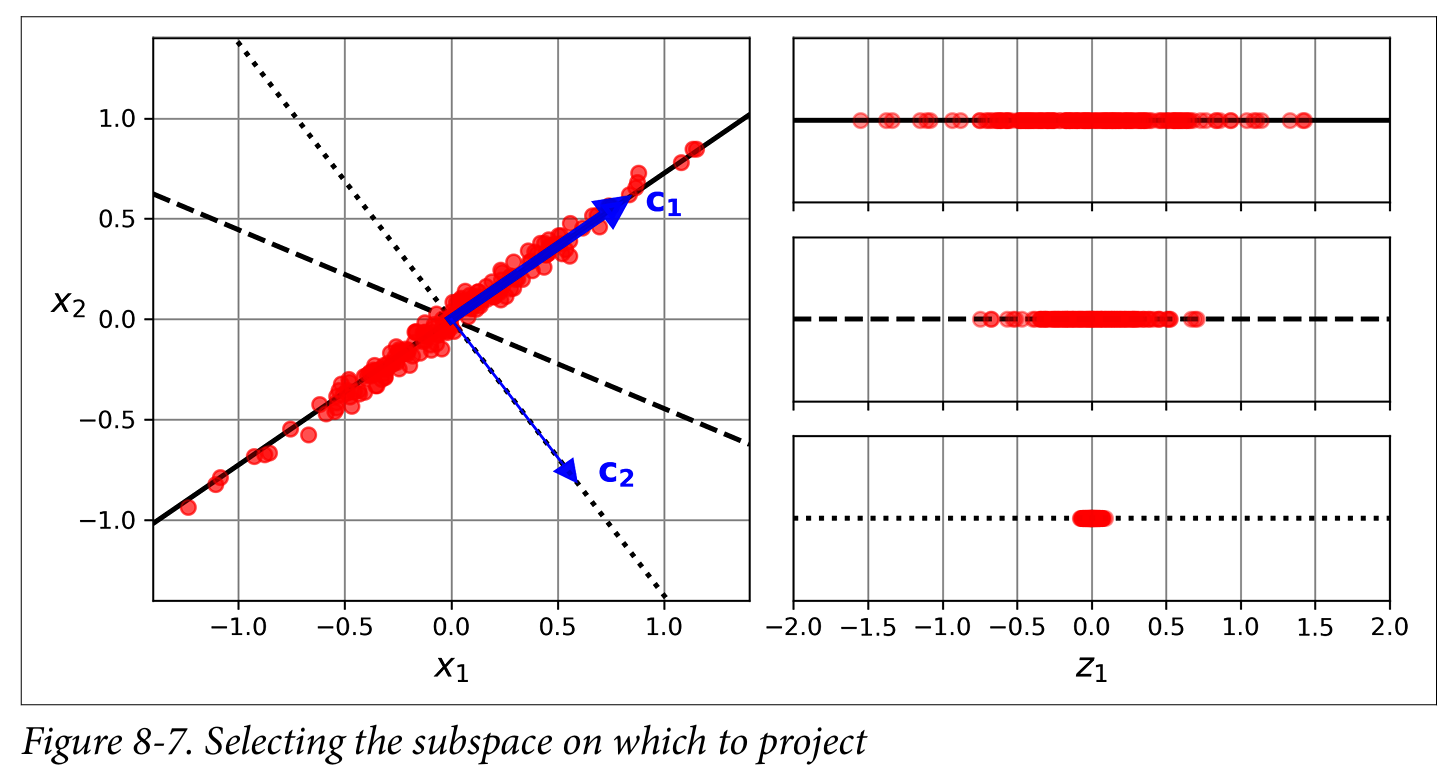



**3.2.1.2 Principal Components(PC)**

From the above example in Figure 8-7, we know that:

* PCA identifies the axis that accounts for the largest amount of variance in the training set (the solid line, c1).

* And it will also find a another axis which is orthogonal to the first one and accounts for the largest amount of the remaining variance (the dotted line, c2).

* If it were a higher-dimensional dataset, PCA would also find a third axis, orthogonal to both previous axes.

To conclude, for a N Dimensional dataset, the PCA will find N axis, and these axis are called Principal Compoment(PC) of the dataset.

**How can we find the principal components(PCs) of a training set?**

A standard matrix factorization technique called singular value decomposition (SVD) that can decompose the training set matrix X into the matrix multiplication of three matrices U, Σ, and V⊺.
where V contains the unit vectors that define all the principal components(PCs) that we are looking for, as shown in below function.


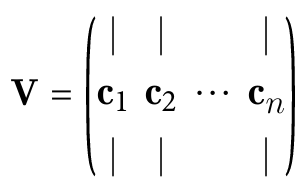


**3.2.1.3 Projecting Down to d Dimensions**

Once we have identified all the principal components(PCs), we can reduce the dimensionality of the dataset form **n** dimensions down to **d** dimensions by projecting it onto the hyperplane defined by **the first d principal components(PCs)**. (Remember we have **n** PCs for a **n**-dimension dataset.)

To project the training set onto the hyperplane and obtain a reduced dataset Xd-proj of dimensionality d, we need to compute the matrix multiplication of the training set matrix X by the matrix Wd, Wd is defined as the matrix containing the first d PCs of matrix V. Using below equation:

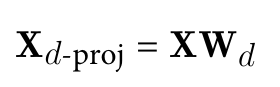

**3.2.1.4 Using Scikit-Learn**

Scikit-Learn's PCA class uses SVD to implement PCA.

The following code applies PCA to reduce the dimensionality of a dataset down to 2 dimensions.

Note: the input dataset should be centered at the origin, and Scikit-Learn's PCA will automatically takes care of centering the data.


In [ ]:
import numpy as np
from scipy.spatial.transform import Rotation

# First generate a 3D dataset X
m = 60
X = np.zeros((m, 3))  # initialize 3D dataset
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # uneven distribution
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # oval
X += 0.28 * np.random.randn(m, 3)  # add more noise
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2]  # shift a bit

In [ ]:
X.shape   # .shape can display the dimensions of the dataset X

(60, 3)

In [ ]:
from sklearn.decomposition import PCA

# Use the scikit-learn's PCA
pca = PCA(n_components=2)  # "n_components": numbers of reduced dimensions
X2D = pca.fit_transform(X)
X2D.shape

(60, 2)

**3.2.1.5 Explained Variance Ratio**

Another useful piece of information is the explained variance ratio of each principal component. The ratio indicates the proportion of the dataset’s variance that lies along each principal component.

In this example, we get a 2D reduced dataset, 2 PCs are used. From below code results, we can see that:

* The first pc explains about 76% of the variance, while the second explains about 15%. In total it will be 91% for this 2D dataset.

* The higher Explained Variance Ratio we got, the more important data imformation we will preserve.

In [ ]:
pca.explained_variance_ratio_

array([0.7578477 , 0.15186921])

**3.2.1.6 Choosing the Right Number of Dimensions**

We can choose the number of dimensions via add each variance ratio to get a sufficiently large portion of the variance.

For example, if we want at least 95% Explained Variance Ratio in total:


In [ ]:
from sklearn.datasets import fetch_openml
# Let's use the dataset from the textbook
mnist = fetch_openml('mnist_784', as_frame=False, parser="auto")

# First we split the dataset into training set and test set
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

X_train.shape   # we can see it is a 784-Dimension dataset

(60000, 784)

In [ ]:
pca = PCA()   # Define the PCA
pca.fit(X_train)   # Fit the dataset
cumsum = np.cumsum(pca.explained_variance_ratio_)   # "cumsum" will add up all explained_variance_ratio
d = np.argmax(cumsum >= 0.95) + 1    # "argmax" will find the d which can reach the maximum result under condition of (cumsum >= 0.95)
d

154

In [ ]:
# Then we can use the "d" we get avbove, which is 154, to reduced the dimensions
pca = PCA(n_components=d)     # "n_components": numbers of reduced dimensions
X_train_reduced = pca.fit_transform(X_train)
X_train_reduced.shape   # we can see we succesefully get the reduced dataset

(60000, 154)

## **3.3 Manifold learning**

The projection learning is not always the best approach to dimensionality reduction. In many cases the subspace may twist and turn.

Here we use the famous Swiss roll toy dataset as an example:

* Figure 8-4 is how a Swiss roll dataset look like.

* From the left side of Figure 8-5, we can see that simply projecting onto a plane would squash different layers of the Swiss roll together.

* The right side of Figure 8-5 is what we want instead --- unroll the Swiss roll to obtain the 2D dataset.

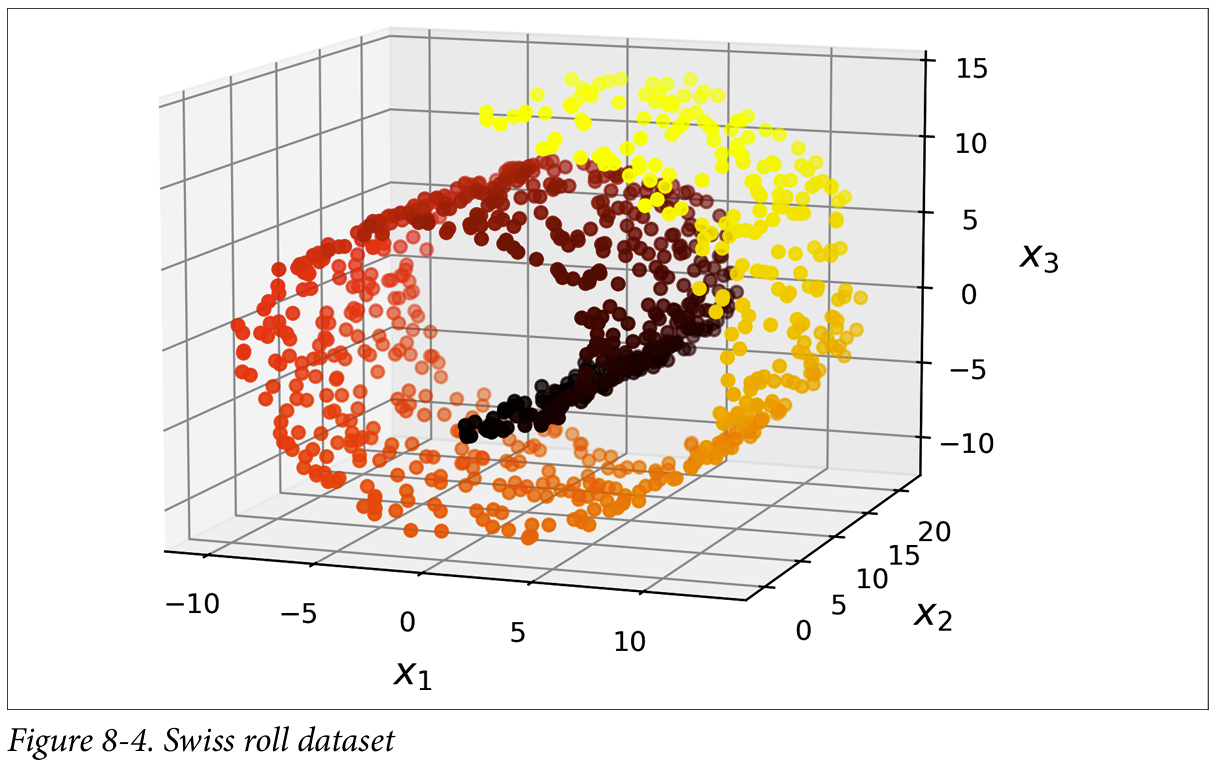
<br><br>

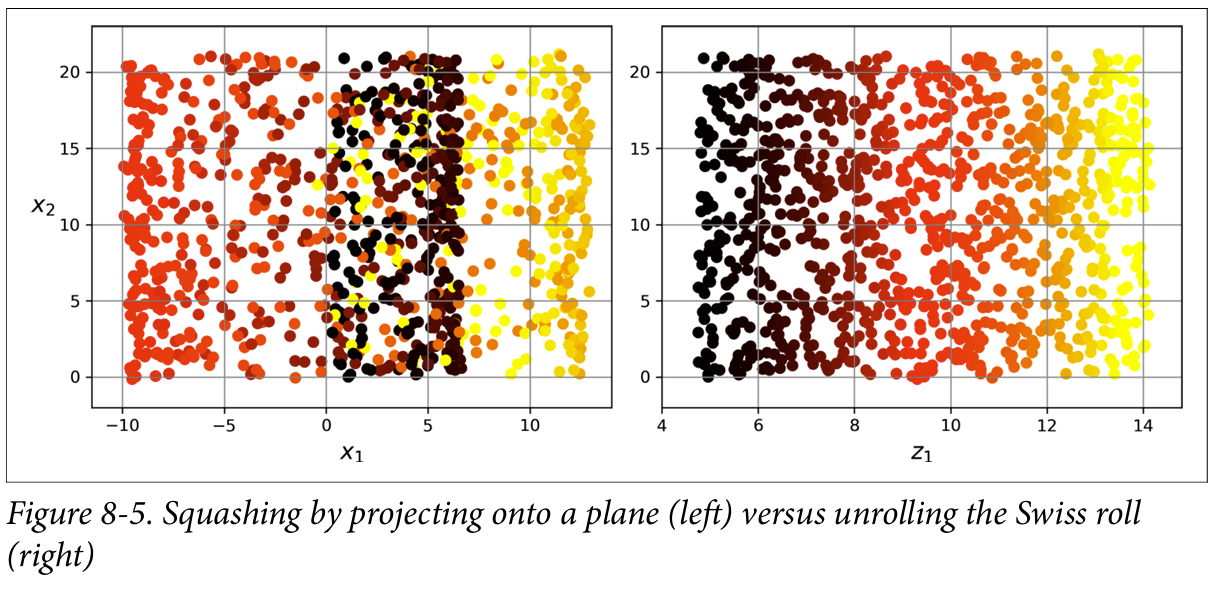

**Manifold assumptions:**

The manifold learning relies on the manifold assumption, also called the manifold hypothesis: most real-world high-dimensional datasets lie close to a much lower-dimensional manifold.

The manifold assumption is often accompanied by another implicit assumption: that tasks (e.g., classification or regression) will be simpler if expressed in the lower-dimensional space of the manifold.

Here we use another two Swiss roll datasets as examples in Figure 8-6 to explain this:

* For the first Swiss roll datasets example in the top row: It is split into two classes:

   * In the 3D space (on the left) the decision boundary would be fairly complex.
   * In the 2D unrolled manifold space (on the right) the decision boundary is a straight line, which is more simple than 3D space.

* For the second Swiss roll datasets example in the bottom row: the implicit assumption does not hold --- the decision boundary is located at x1 = 5.

   * This decision boundary looks very simple in the original 3D space (a vertical plane), but it looks more complex in the unrolled manifold (a collection of four independent line segments).

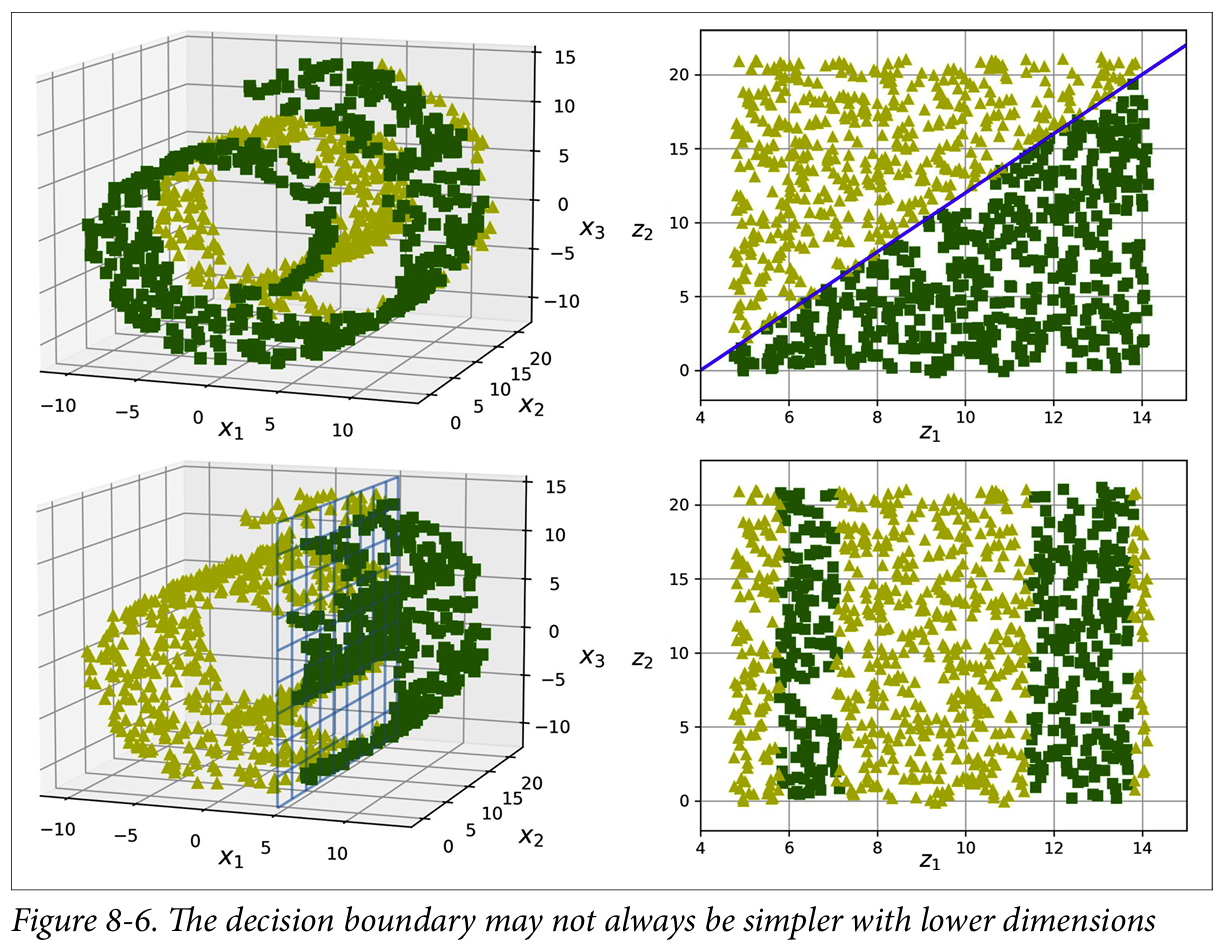

In short, reducing the dimensionality of your training set before training a model will usually speed up training, but it may not always lead to a better or simpler solution; it all depends on the dataset.

### **3.3.1 Locally linear embedding (LLE)**

Locally linear embedding(LLE) is a nonlinear dimensionality reduction (NLDR) technique.

**What is the workflow of LLE?**

It works by first measuring how each training instance linearly relates to its nearest neighbors, and then looking for a low-dimensional representation of the training set where these local relationships are best preserved.

* Step1: for each training instance, the algorithm identifies its k-nearest neighbors.

* Step2: find the linear relationship between the training instance and its k-nearest neighbors. And we will get a optimized Weight matrix that encodes the local linear relationships between the training instances.

* Step3: map the training instances into a lower d-dimensional space while preserving these local relationships as much as possible.

This approach makes it particularly good at unrolling twisted manifolds.

Here we use a Swiss roll dataset from the textbook as an example:

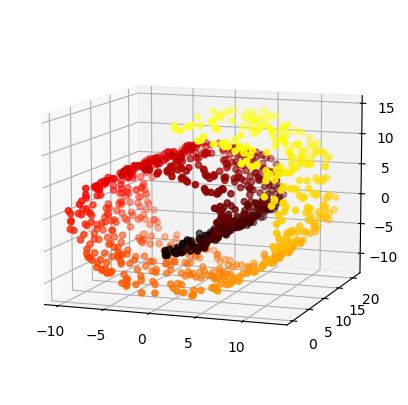

In [ ]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# First lets make a swiss_roll dataset
X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

# Lets plot the swiss_roll dataset
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
darker_hot = ListedColormap(plt.cm.hot(np.linspace(0, 0.8, 256)))
ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=t, cmap=darker_hot)
ax.view_init(10, -70)
plt.show()

In [ ]:
# Uses Scikit-Learn’s LocallyLinearEmbedding class to unroll it.
# "n_components": numbers of reduced dimensions
# "n_neighbors": number of neighbors
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)

# Then we can use the defined LLE algorithm to unroll this swiss roll
X_unrolled = lle.fit_transform(X_swiss)

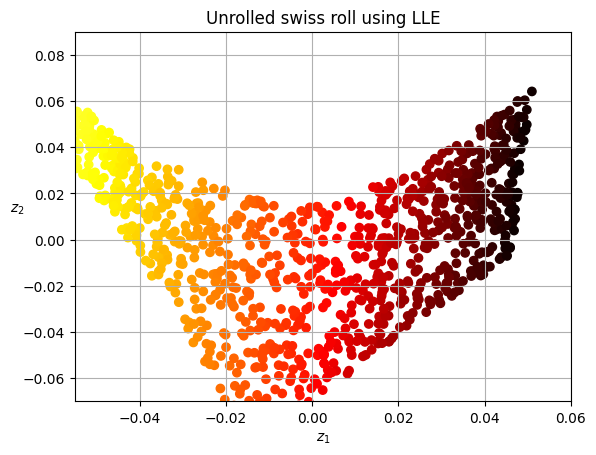

In [ ]:
# Plot the unrolled dataset
plt.scatter(X_unrolled[:, 0], X_unrolled[:, 1], c=t, cmap=darker_hot)
plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
plt.axis([-0.055, 0.060, -0.070, 0.090])
plt.grid(True)

plt.title("Unrolled swiss roll using LLE")
plt.show()

As we can see, LLE is quite different from the projection techniques, it can also construct much better low-dimensional representations, especially if the data is nonlinear and manifold.

### **3.3.2 t-distributed stochastic neighbor embedding (t-SNE)**

The PCA and LLE algorithms above only emphasize that similar data should be kept as similar as possible after dimensionality reduction. Instead of only caring the similar data, t-SNE algorithm will trying to keep similar instances close and dissimilar instances apart. So, it is mostly used for visualization, in particular to visualize clusters of instances in high dimensional space, which means TSNE can reduce the high-dimension dataset into 2D or 3D, which is good for visualization.

Here let's go through a exercise in textbook [6]:

Use t-SNE to reduce the first 5,000 images of the MNIST dataset down to two dimensions and plot the result using Matplotlib

In [ ]:
# Take an example using the mnist data from the textbook, MNIST is a dataset that all samples are images
X_train = mnist.data[:60000]
y_train = mnist.target[:60000]

# Take the first 5,000 images of the MNIST dataset
X_sample, y_sample = X_train[:5000], y_train[:5000]

X_sample.shape

(5000, 784)

In [ ]:
from sklearn.manifold import TSNE

# The parameter n_components=2 indicates that the data will be reduced to 2 dimensions
# The init = "random" means how the initial positions of the data points are chosen before dimentionality reduction.
# The learning rate for t-SNE is usually in the range [10, 1000].
# The ‘auto’ option means automatically selects an appropriate learning rate based on the number of samples in the dataset.
# If the learning rate is too high, each data point can be vew as have equidstance from its nearest neighbours.
# If the learning rate is too low, most points may look compressed in a dense cloud.
tsne = TSNE(n_components=2, init="random", learning_rate="auto", random_state=42)

# Fit the t-SNE algorithm into the X_sample dataset
X_reduced = tsne.fit_transform(X_sample)

# let's check the dimention of this dataset after dimentionality reduction
X_reduced.shape

(5000, 2)

Now, let's use Matplotlib's scatter() function to plot a scatterplot, using a different color for each cluster:

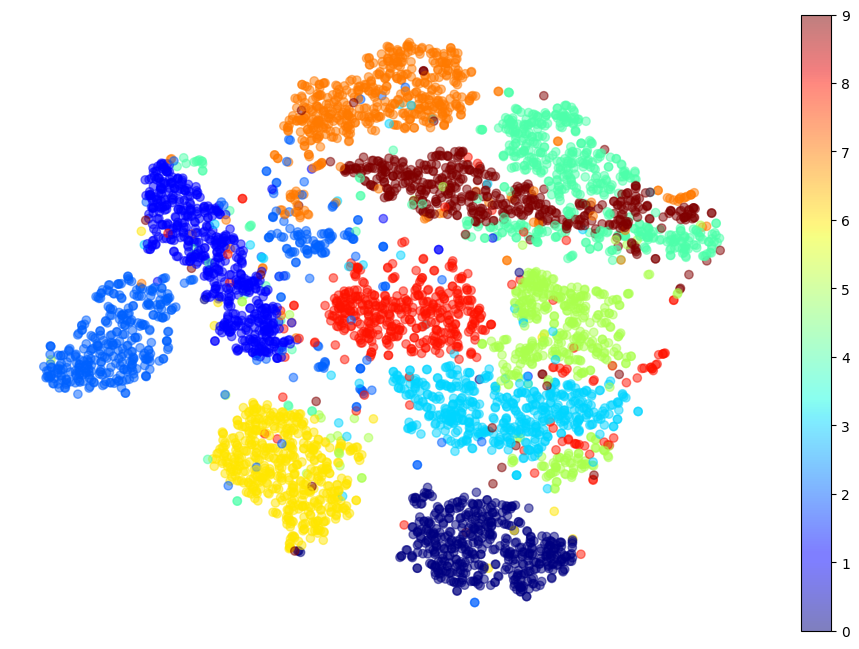

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_sample.astype(np.int8), cmap="jet", alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

From the picture above, we can see most clusters are nicely separated from the others, t-SNE identified clusters of similar images.

Then, let's use PCA method to reduce the dimensionality, and compare with t-SNE.

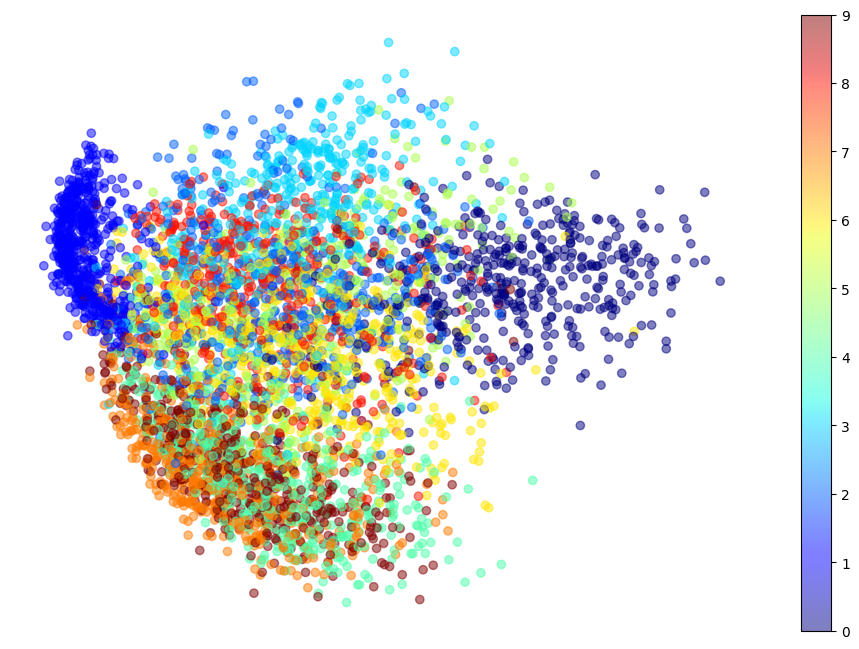

In [ ]:
from sklearn.decomposition import PCA

# define a PCA algorithm
pca = PCA(n_components=2, random_state=42)
X_pca_reduced = pca.fit_transform(X_sample)

# plot the scatter graph
plt.figure(figsize=(12, 8))
plt.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], c=y_sample.astype(np.int8), cmap="jet", alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

From the picture above, we can see that PCA only gather similar training instance closer, but didn't handle the dissimilar training instances. So most clusters are overlapped.

# **4 References**

[5] https://github.com/chembl/chembl_webresource_client

[6] Géron A. Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow : Concepts, Tools, and Techniques to Build Intelligent Systems. Third edition. O’Reilly Media, Inc.; 2023.
  
